In [5]:
import pandas as pd

# Leer los datos del archivo CSV
data = pd.read_csv('Tickets.csv')

# Crear una lista con los nombres de las columnas de tipos de falla
tipos_falla = ['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT']
# Función para generar el número binario
def generar_binario(row):
    binario = ''
    for tipo in tipos_falla:
        binario += str(row[tipo])
    return binario

# Aplicar la función a cada fila del DataFrame
data['Binario'] = data.apply(generar_binario, axis=1)

# Imprimir los resultados
print(data[['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT', 'Binario','Tg (min)']])


      SW  HW  C  AC  DC  PC  MTTO  AT  D  P  BT      Binario Tg (min)
0      1   0  0   0   0   0     0   0  0  0   0  10000000000    14111
1      1   0  0   0   0   0     0   0  0  0   0  10000000000    14552
2      1   0  0   0   0   0     0   0  0  0   0  10000000000    26101
3      1   0  0   0   0   0     0   0  0  0   0  10000000000    37930
4      0   1  0   0   0   0     0   0  0  0   0  01000000000     4246
...   ..  .. ..  ..  ..  ..   ...  .. .. ..  ..          ...      ...
1443   0   0  0   1   0   0     0   0  0  0   0  00010000000      112
1444   0   0  0   1   0   0     0   0  0  0   0  00010000000      938
1445   0   0  0   0   0   0     1   0  0  0   0  00000010000   121984
1446   0   0  0   0   1   0     0   0  0  0   0  00001000000     1379
1447   0   1  0   0   0   0     0   0  0  0   0  01000000000     3917

[1448 rows x 13 columns]


C:\Users\Amalia\AppData\Local\Temp\ipykernel_4000\1001444247.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia_1.index, y=frecuencia_1.values, palette='viridis')
C:\Users\Amalia\AppData\Local\Temp\ipykernel_4000\1001444247.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Intervalo', y='Frecuencia', data=frecuencia_2, palette='viridis')


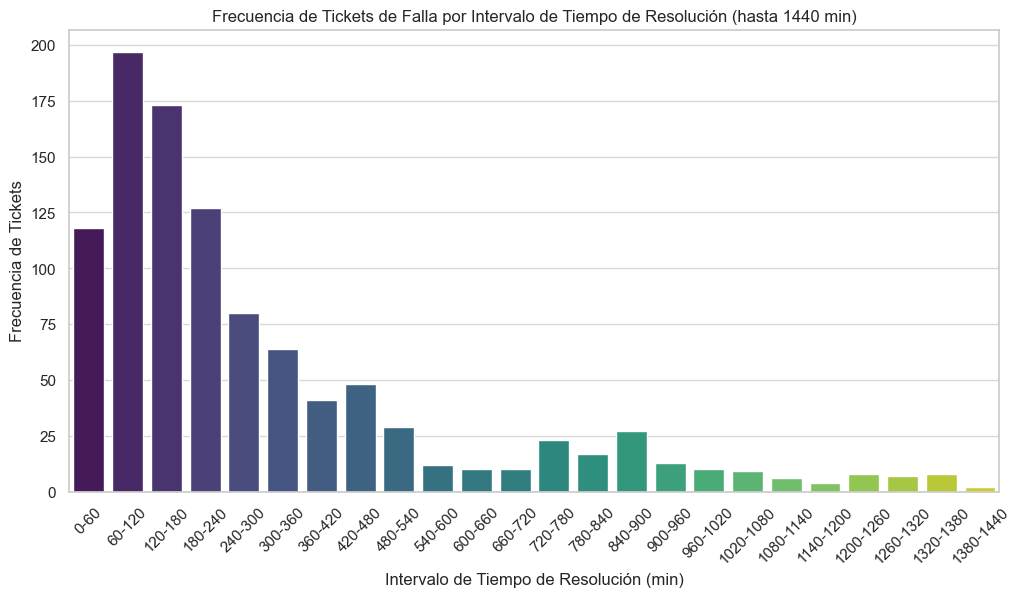

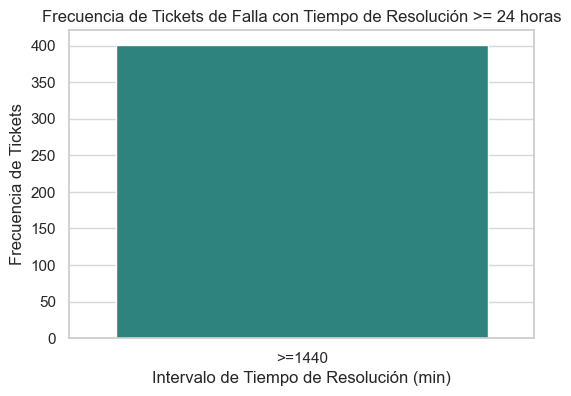

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer los datos del archivo CSV
data = pd.read_csv('Tickets.csv')

# Convertir la columna 'Tg (min)' a numérico, forzando errores a NaN
data['Tg (min)'] = pd.to_numeric(data['Tg (min)'], errors='coerce')

# Crear intervalos de 60 minutos hasta 1440 minutos
bins_1 = range(0, 1441, 60)  # Definir los límites de los intervalos de 0 a 1440 en pasos de 60
labels_1 = [f"{i}-{i + 60}" for i in bins_1[:-1]]  # Crear etiquetas para los intervalos

# Asignar cada tiempo de resolución a su intervalo correspondiente (hasta 1440 min)
data['Intervalo_1'] = pd.cut(data['Tg (min)'], bins=bins_1, labels=labels_1, right=False)

# Contar la frecuencia de tickets en cada intervalo (hasta 1440 min)
frecuencia_1 = data['Intervalo_1'].value_counts().sort_index()

# Crear un DataFrame para los tickets con tiempo de resolución >= 1440 min
data_2 = data[data['Tg (min)'] >= 1440]

# Contar la frecuencia de tickets con tiempo de resolución >= 1440 min
frecuencia_2 = pd.DataFrame({'Intervalo': ['>=1440'], 'Frecuencia': [len(data_2)]})

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el primer gráfico de barras (hasta 1440 min)
plt.figure(figsize=(12, 6))
sns.barplot(x=frecuencia_1.index, y=frecuencia_1.values, palette='viridis')
plt.title('Frecuencia de Tickets de Falla por Intervalo de Tiempo de Resolución (hasta 1440 min)')
plt.xlabel('Intervalo de Tiempo de Resolución (min)')
plt.ylabel('Frecuencia de Tickets')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)

# Crear el segundo gráfico de barras (>=1440 min)
plt.figure(figsize=(6, 4))
sns.barplot(x='Intervalo', y='Frecuencia', data=frecuencia_2, palette='viridis')
plt.title('Frecuencia de Tickets de Falla con Tiempo de Resolución >= 24 horas')
plt.xlabel('Intervalo de Tiempo de Resolución (min)')
plt.ylabel('Frecuencia de Tickets')
plt.grid(axis='y', alpha=0.75)

plt.show()


C:\Users\Amalia\AppData\Local\Temp\ipykernel_1332\2417279239.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_promedios, x='Tipo de Falla', y='Promedio Tiempo (min)', palette='viridis')


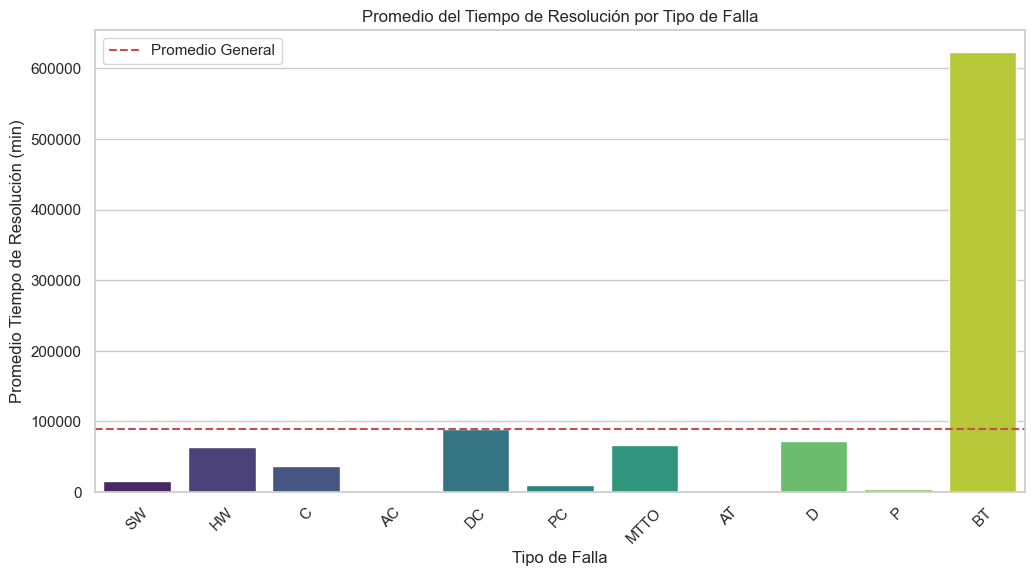

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer los datos del archivo CSV
data = pd.read_csv('Tickets.csv')

# Convertir la columna 'Tg (min)' a numérico, forzando errores a NaN
data['Tg (min)'] = pd.to_numeric(data['Tg (min)'], errors='coerce')

# Lista de tipos de fallas
tipos_falla = ['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT']

# Calcular promedios
promedios = {}
for tipo in tipos_falla:
    promedios[tipo] = data[data[tipo] == 1]['Tg (min)'].mean()

# Crear un DataFrame para los promedios
df_promedios = pd.DataFrame(list(promedios.items()), columns=['Tipo de Falla', 'Promedio Tiempo (min)'])

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_promedios, x='Tipo de Falla', y='Promedio Tiempo (min)', palette='viridis')
plt.title('Promedio del Tiempo de Resolución por Tipo de Falla')
plt.xlabel('Tipo de Falla')
plt.ylabel('Promedio Tiempo de Resolución (min)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.axhline(y=df_promedios['Promedio Tiempo (min)'].mean(), color='r', linestyle='--', label='Promedio General')  # Línea media
plt.legend()
plt.show()


In [15]:
import pandas as pd

# Leer los datos del archivo CSV
data = pd.read_csv('Tickets.csv')

# Crear una lista con los nombres de las columnas de tipos de falla
tipos_falla = ['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT']
# Función para generar el número binario
def generar_binario(row):
    binario = ''
    for tipo in tipos_falla:
        binario += str(row[tipo])
    return binario

# Aplicar la función a cada fila del DataFrame
data['Binario'] = data.apply(generar_binario, axis=1)

# Imprimir los resultados
print(data[['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT', 'Binario','Tg (min)']])

print(data['Tg (min)'].unique()) # tenía errores en esa columna habia una fila con texto 


      SW  HW  C  AC  DC  PC  MTTO  AT  D  P  BT      Binario  Tg (min)
0      1   0  0   0   0   0     0   0  0  0   0  10000000000     14111
1      1   0  0   0   0   0     0   0  0  0   0  10000000000     14552
2      1   0  0   0   0   0     0   0  0  0   0  10000000000     26101
3      1   0  0   0   0   0     0   0  0  0   0  10000000000     37930
4      0   1  0   0   0   0     0   0  0  0   0  01000000000      4246
...   ..  .. ..  ..  ..  ..   ...  .. .. ..  ..          ...       ...
1443   0   0  0   1   0   0     0   0  0  0   0  00010000000       112
1444   0   0  0   1   0   0     0   0  0  0   0  00010000000       938
1445   0   0  0   0   0   0     1   0  0  0   0  00000010000    121984
1446   0   0  0   0   1   0     0   0  0  0   0  00001000000      1379
1447   0   1  0   0   0   0     0   0  0  0   0  01000000000      3917

[1448 rows x 13 columns]
[ 14111  14552  26101  37930   4246 125491  13516   4331 112048   1096
   1575    138    755 122602  10829    103    106  

In [16]:
import pandas as pd
import numpy as np

# Leer los datos del archivo CSV
data = pd.read_csv('Tickets.csv')

# Crear una lista con los nombres de las columnas de tipos de falla
tipos_falla = ['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT']

# Verificar que las columnas de tipos de falla sean binarias
for tipo in tipos_falla:
    if not all(data[tipo].isin([0, 1])):
        print(f"Error: La columna '{tipo}' contiene valores no binarios.")
        break

# Separar las variables independientes y dependiente
X = data[tipos_falla]  # Variables independientes
y = data['Tg (min)']   # Variable dependiente

# Asegurarse de que X solo contenga valores enteros
X = X.astype(int)

# Añadir una columna de unos para el término independiente
X['Intercept'] = 1

# Convertir a matrices de NumPy
X_np = X.to_numpy()
y_np = y.to_numpy()

# Calcular los coeficientes beta usando la pseudoinversa
beta = np.linalg.pinv(X_np) @ y_np.astype(int)

# Calcular las predicciones y residuos
y_hat = X_np @ beta
residuos = y_np - y_hat

# Calcular el coeficiente de determinación R^2
R2 = 1 - np.sum(residuos**2) / np.sum((y_np - np.mean(y_np))**2)

# Imprimir los resultados
print(f'Coeficientes beta: {beta}')
print(f'Coeficiente de determinación R^2: {R2:.2f}')


Coeficientes beta: [-65726.16257043 -18213.51992779 -44567.38479266 -80511.37700623
   7574.73520734 -72344.5276498  -15150.97263049 -81761.38479266
 -10189.58479266 -78132.05145932 540932.61520734  81910.38479266]
Coeficiente de determinación R^2: 0.36


Coeficientes beta: [-65726.16257043 -18213.51992779 -44567.38479266 -80511.37700623
   7574.73520734 -72344.5276498  -15150.97263049 -81761.38479266
 -10189.58479266 -78132.05145932 540932.61520734  81910.38479266]
Coeficiente de determinación R^2: 0.36


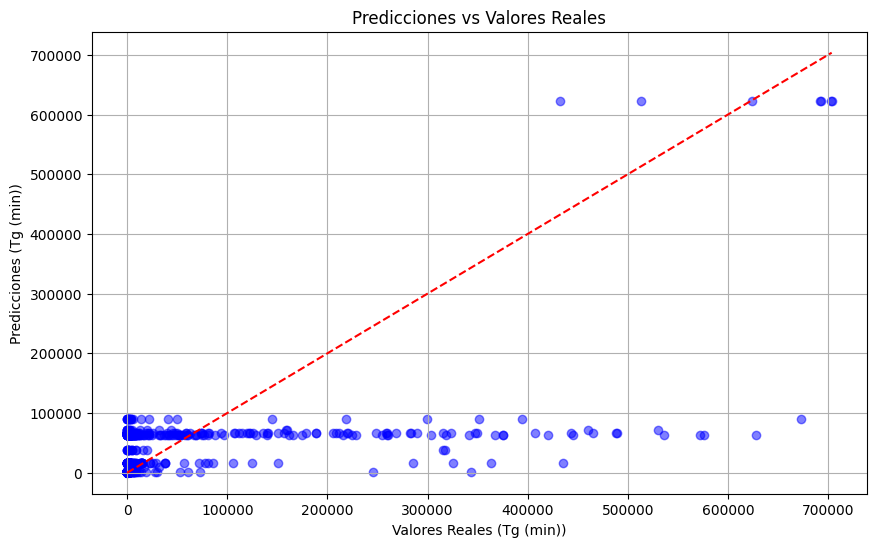

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer los datos del archivo CSV
data = pd.read_csv('Tickets.csv')

# Crear una lista con los nombres de las columnas de tipos de falla
tipos_falla = ['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT']

# Separar las variables independientes y dependiente
X = data[tipos_falla]  # Variables independientes
y = data['Tg (min)']   # Variable dependiente

# Asegurarse de que X solo contenga valores enteros
X = X.astype(int)

# Añadir una columna de unos para el término independiente
X['Intercept'] = 1

# Convertir a matrices de NumPy
X_np = X.to_numpy()
y_np = y.to_numpy()

# Calcular los coeficientes beta usando la pseudoinversa
beta = np.linalg.pinv(X_np) @ y_np

# Calcular las predicciones y residuos
y_hat = X_np @ beta
residuos = y_np - y_hat

# Calcular el coeficiente de determinación R^2
R2 = 1 - np.sum(residuos**2) / np.sum((y_np - np.mean(y_np))**2)

# Imprimir los resultados
print(f'Coeficientes beta: {beta}')
print(f'Coeficiente de determinación R^2: {R2:.2f}')

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_np, y_hat, color='blue', alpha=0.5)
plt.plot([y_np.min(), y_np.max()], [y_np.min(), y_np.max()], color='red', linestyle='--')  # Línea de referencia
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales (Tg (min))')
plt.ylabel('Predicciones (Tg (min))') 
plt.grid()
plt.show()
